# 参考ページ
### 1.YOLOXの学習をCOCOのデータセットから試してみた
https://misoji-engineer.com/archives/yolox-tiny-train.html

### 2.COCO Common Object in Context
https://cocodataset.org/#download

# 1. ColabのGPUを使用

In [2]:
!nvidia-smi

Fri Sep 30 12:43:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 2. FiftyOneでCOCOのデータセットを入手

In [3]:
# FiftyOne をインストール
# 2022/5時点でのopencv-python-headless 4.5.5.64では動作しないので4.5.4.60を再インストール
!pip install fiftyone
!pip install opencv-python-headless==4.5.4.60

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 29.6 MB/s 
     |████████████████████████████████| 106 kB 70.2 MB/s 
     |████████████████████████████████| 61 kB 281 kB/s 
     |████████████████████████████████| 564 kB 73.0 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 29.2 MB 1.2 MB/s 
     |████████████████████████████████| 508 kB 41.8 MB/s 
     |████████████████████████████████| 57 kB 6.8 MB/s 
     |████████████████████████████████| 79.9 MB 1.2 MB/s 
     |████████████████████████████████| 226 kB 76.6 MB/s 
     |████████████████████████████████| 135 kB 71.3 MB/s 
     |████████████████████████████████| 47 kB 5.5 MB/s 
     |████████████████████████████████| 132 kB 39.2 MB/s 
     |████████████████████████████████| 133 kB 75.7 MB/s 
     |████████████████████████████████| 80 kB 10.5 MB/s 
     |████████████████████████████████| 

In [4]:
#split="train"にすれば学習(train)データもダウンロード可能だが、容量が20GB近いので実施しない
#サンプルコードのままsplit="validation"の検証用データを表示

import fiftyone as fo
import fiftyone.zoo as foz

# List available zoo datasets
print(foz.list_zoo_datasets())

#
# Load the COCO-2017 validation split into a FiftyOne dataset
#
# This will download the dataset from the web, if necessary
#
dataset = foz.load_zoo_dataset("coco-2017", split="validation")

# Give the dataset a new name, and make it persistent so that you can
# work with it in future sessions
dataset.name = "coco-2017-validation-example"
dataset.persistent = True

# Visualize the in the App
session = fo.launch_app(dataset)

Migrating database to v0.17.2


INFO:fiftyone.migrations.runner:Migrating database to v0.17.2


['activitynet-100', 'activitynet-200', 'bdd100k', 'caltech101', 'caltech256', 'cifar10', 'cifar100', 'cityscapes', 'coco-2014', 'coco-2017', 'fashion-mnist', 'fiw', 'hmdb51', 'imagenet-2012', 'imagenet-sample', 'kinetics-400', 'kinetics-600', 'kinetics-700', 'kinetics-700-2020', 'kitti', 'kitti-multiview', 'lfw', 'mnist', 'open-images-v6', 'quickstart', 'quickstart-geo', 'quickstart-groups', 'quickstart-video', 'ucf101', 'voc-2007', 'voc-2012']


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [22.5s elapsed, 0s remaining, 93.6Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [22.5s elapsed, 0s remaining, 93.6Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading images to '/root/fiftyone/coco-2017/tmp-download/val2017.zip'


 100% |██████|    6.1Gb/6.1Gb [1.3m elapsed, 0s remaining, 103.4Mb/s]     


INFO:eta.core.utils: 100% |██████|    6.1Gb/6.1Gb [1.3m elapsed, 0s remaining, 103.4Mb/s]     


Extracting images to '/root/fiftyone/coco-2017/validation/data'


INFO:fiftyone.utils.coco:Extracting images to '/root/fiftyone/coco-2017/validation/data'


Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |███████████████| 5000/5000 [28.3s elapsed, 0s remaining, 192.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [28.3s elapsed, 0s remaining, 192.9 samples/s]      


Dataset 'coco-2017-validation' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation' created


In [6]:
#COCOのデータセットから700のtrainデータと300のvalデータを出力する
#COCO形式で "person", "car", "chair"の3つのラベルで出力する
 
classes = ["person", "car"]
 
train_dataset = dataset[:700]
val_dataset = dataset[700:1000]
test_dataset = dataset[1000:1500]
 
# COCO形式でエクスポート
train_dataset.export(
    export_dir=f"/content/data/train/",
    dataset_type=fo.types.COCODetectionDataset,
    split="train",
    classes=classes,
)
val_dataset.export(
    export_dir=f"/content/data/val/",
    dataset_type=fo.types.COCODetectionDataset,
    split="val",
    classes=classes,
)
test_dataset.export(
    export_dir=f"/content/data/test/",
    dataset_type=fo.types.COCODetectionDataset,
    split="test",
    classes=classes,
)

Directory '/content/data/train/' already exists; export will be merged with existing files


Ignoring unsupported parameter 'split'


   4% |/----------------|  28/700 [112.9ms elapsed, 2.7s remaining, 248.1 samples/s] 

/usr/local/lib/python3.7/dist-packages/fiftyone/utils/coco.py:802: UserWarning: Ignoring object with label 'chair' not in provided classes
  warnings.warn(msg)


 100% |█████████████████| 700/700 [2.9s elapsed, 0s remaining, 235.6 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 700/700 [2.9s elapsed, 0s remaining, 235.6 samples/s]      


Directory '/content/data/val/' already exists; export will be merged with existing files


Ignoring unsupported parameter 'split'


 100% |█████████████████| 300/300 [1.2s elapsed, 0s remaining, 274.5 samples/s]         


INFO:eta.core.utils: 100% |█████████████████| 300/300 [1.2s elapsed, 0s remaining, 274.5 samples/s]         


Directory '/content/data/test/' already exists; export will be merged with existing files


Ignoring unsupported parameter 'split'


 100% |█████████████████| 500/500 [2.1s elapsed, 0s remaining, 252.4 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [2.1s elapsed, 0s remaining, 252.4 samples/s]      


# 3. YOLOX-Tinyでの学習
YOLOXの中にも何個かのモデルに分かれています。

詳細はYOLOXのGithubを見てもらえればと思います。(というか筆者が説明できない)

 https://github.com/Megvii-BaseDetection/YOLOX

 

今回は軽量モデル(Light Models)のYOLOX-tinyを使って学習していきます。

ダウンロードしたデータを学習できるように整理します。

In [7]:
# YOLOX用にフォルダ作成・データセットをコピー
!mkdir dataset
!mkdir dataset/images
!mkdir dataset/images/train2017
!mkdir dataset/images/val2017
!mkdir dataset/annotations
 
!cp -rf /content/data/train/data/*.jpg dataset/images/train2017
!cp -rf /content/data/val/data/*.jpg dataset/images/val2017
!cp -rf /content/data/train/labels.json dataset/annotations/train_annotations.json
!cp -rf /content/data/val/labels.json  dataset/annotations/validation_annotations.json

In [8]:
#YOLOXをインストール
!git clone https://github.com/Megvii-BaseDetection/YOLOX.git
%cd YOLOX
 
!pip3 install -v -e .  # or  python3 setup.py develop

Cloning into 'YOLOX'...
remote: Enumerating objects: 1723, done.
remote: Total 1723 (delta 0), reused 0 (delta 0), pack-reused 1723
Receiving objects: 100% (1723/1723), 6.83 MiB | 4.22 MiB/s, done.
Resolving deltas: 100% (1020/1020), done.
/content/YOLOX
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://g

YOLOXフォルダにあるYOLOX-tiny.pyのファイルを修正します

In [9]:
#YOLOX-tinyを使用
!cp /content/YOLOX/exps/default/yolox_tiny.py /content/YOLOX

あとはYOLOXの学習をさせるだけです。2~3時間ぐらいかかりました。

In [10]:
#yolox-tinyで学習させる(約2時間ぐらいかかる)
!python tools/train.py \
    -f yolox_tiny.py \
    -d 1 \
    -b 16 \
    --fp16 \
    -o

2022-09-30 13:16:23 | INFO     | yolox.core.trainer:130 - args: Namespace(batch_size=16, cache=False, ckpt=None, devices=1, dist_backend='nccl', dist_url=None, exp_file='yolox_tiny.py', experiment_name='yolox_tiny', fp16=True, logger='tensorboard', machine_rank=0, name=None, num_machines=1, occupy=True, opts=[], resume=False, start_epoch=None)
2022-09-30 13:16:23 | INFO     | yolox.core.trainer:131 - exp value:
╒═══════════════════╤════════════════════════════════════════════════════════════╕
│ keys              │ values                                                     │
╞═══════════════════╪════════════════════════════════════════════════════════════╡
│ seed              │ None                                                       │
├───────────────────┼────────────────────────────────────────────────────────────┤
│ output_dir        │ './YOLOX_outputs'                                          │
├───────────────────┼────────────────────────────────────────────────────────────┤
│ pr

In [6]:
#後のコードでOPENCVのエラーが出たので一度最新をインストール
!pip uninstall opencv-python;
!pip install opencv-python==4.5.4.60
!pip install opencv-python-headless==4.5.4.60

Found existing installation: opencv-python 4.6.0.66
Uninstalling opencv-python-4.6.0.66:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.6.0.66.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Gui-48e93776.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libQt5XcbQpa-c112ba75.so.5.15.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python.libs/libavcodec-5896f664.so.58.134.100
    /usr/local/lib/python3.7/d

In [7]:
#テスト用の画像データのパスを貼り付けて、学習させたモデルでテスト(demo.py)する
TEST_IMAGE_PATH = "/content/data/test/data/000000121673.jpg"
MODEL_PATH = "/content/YOLOX/YOLOX_outputs/yolox_tiny/best_ckpt.pth"
 
!python YOLOX/tools/demo.py image \
    -f yolox_tiny.py \
    -c {MODEL_PATH} \
    --path {TEST_IMAGE_PATH} \
    --tsize 416 \
    --save_result \
    --device gpu

2022-09-30 15:28:40.687 | INFO     | __main__:main:259 - Args: Namespace(camid=0, ckpt='/content/YOLOX/YOLOX_outputs/yolox_tiny/best_ckpt.pth', conf=0.3, demo='image', device='gpu', exp_file='yolox_tiny.py', experiment_name='yolox_tiny', fp16=False, fuse=False, legacy=False, name=None, nms=0.3, path='/content/data/test/data/000000121673.jpg', save_result=True, trt=False, tsize=416)
2022-09-30 15:28:40.874 | INFO     | __main__:main:269 - Model Summary: Params: 5.03M, Gflops: 6.44
2022-09-30 15:28:42.623 | INFO     | __main__:main:282 - loading checkpoint
2022-09-30 15:28:42.701 | INFO     | __main__:main:286 - loaded checkpoint done.
2022-09-30 15:28:44.258 | INFO     | __main__:inference:165 - Infer time: 1.5486s
2022-09-30 15:28:44.259 | INFO     | __main__:image_demo:202 - Saving detection result in ./YOLOX_outputs/yolox_tiny/vis_res/2022_09_30_15_28_42/000000121673.jpg


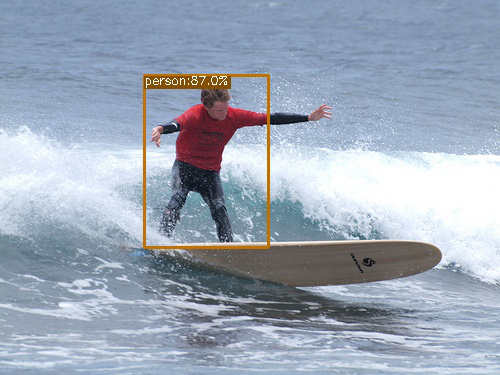

In [8]:
#テスト(demo.py)して画像認識させた結果を表示する
#下記パスはテストの日付入った一例なので適宜修正すること
from PIL import Image
 
OUTPUT_IMAGE_PATH = "/content/YOLOX/YOLOX_outputs/yolox_tiny/vis_res/2022_09_30_15_20_58/000000121673.jpg" 
Image.open(OUTPUT_IMAGE_PATH)

# Googleドライブに学習結果

In [12]:
from google.colab import drive 
drive.mount('/content/drive')
#!mkdir -p '/content/drive/My Drive/work/'
%cd '/content/drive/My Drive/work/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/work


In [14]:
#Googleドライブにコピー
!cp -rf /content/YOLOX/YOLOX_outputs /content/drive/MyDrive/work